# Klasyfikacja Grzybów
W ramach *Projektu 1* wybrano temat klasyfikacji grzybów na trujące / jadalne na podstawie bazy danych **National Audubon Society Field Guides**, które zostały udostępnione na stronie https://archive.ics.uci.edu/dataset/73/mushroom

## Dodatkowe informacje
Ten zestaw danych obejmuje opisy hipotetycznych próbek odpowiadających 23 gatunkom grzybów z rodziny Agaricus i Lepiota. Każdy gatunek jest oznaczony jako zdecydowanie jadalny, zdecydowanie trujący lub o nieznanej jadalności i niezalecany do spożycia. Ta ostatnia kategoria została połączona z trującą. Przewodnik jednoznacznie stwierdza, że nie ma prostych zasad określających jadalność grzyba; nie ma reguły takiej jak "trzy listki, trzymaj się z daleka" dla trującego dębu i bluszczu.

## Trudność problemu
*Czy baza danych jest skomplikowana i ma błędy lub braki danych?*

Baza danych składa się z ponad 8000 rekordów i 22 atrybutów, w których znajdziemy atrybuty typu kategorycznego oraz binarnego. Ponadto baza danych zawiera braki w danych.

*Czy jest ona dość słabo przebadana czy już wydaje się „oklepana”?*

Baza danych pochodzi z 1987 roku, jednak pod względem wyświetleń na stronie, z której pobierałem dane, nie znajduje się w pierwszej dziesiątce (biorąc pod uwagę tylko bazy danych, które spełniały wcześniejsze wymogi).

## Dane
Przejdźmy do wczytania danych. Następnie spójrzmy na pierwych kilka rekordów i podstawowe statystyki:

In [1]:
import pandas as pd

df = pd.read_csv("mushroom/agaricus-lepiota-data.csv")

In [2]:
print(df.describe())

       poisonous cap-shape cap-surface cap-color bruises  odor  \
count       8124      8124        8124      8124    8124  8124   
unique         2         6           4        10       2     9   
top            e         x           y         n       f     n   
freq        4208      3656        3244      2284    4748  3528   

       gill-attachment gill-spacing gill-size gill-color  ...  \
count             8124         8124      8124       8124  ...   
unique               2            2         2         12  ...   
top                  f            c         b          b  ...   
freq              7914         6812      5612       1728  ...   

       stalk-surface-below-ring stalk-color-above-ring stalk-color-below-ring  \
count                      8124                   8124                   8124   
unique                        4                      9                      9   
top                           s                      w                      w   
freq               

## Przygotowanie do eksperymentów 1
Brakujące wartości w bazie danych grzybów są oznaczone jako '?'. Tylko jeden atrybut (stalk-root) zawiera braki w danych. Przygotujmy listę brakujących wartości. Następnie wczytajmy ponownie bazę danych z dodatkowym parametrem, tak aby Pandas je rozpoznawał.

In [3]:
print(df.head())

  poisonous cap-shape cap-surface cap-color bruises odor gill-attachment  \
0         p         x           s         n       t    p               f   
1         e         x           s         y       t    a               f   
2         e         b           s         w       t    l               f   
3         p         x           y         w       t    p               f   
4         e         x           s         g       f    n               f   

  gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
0            c         n          k  ...                        s   
1            c         b          k  ...                        s   
2            c         b          n  ...                        s   
3            c         n          n  ...                        s   
4            w         b          k  ...                        s   

  stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
0                      w                      w         

Możemy sprawdzić rozkład brakujących wartości w każdej z kolumn:

In [4]:
missing_values = ['?']
df = pd.read_csv("mushroom/agaricus-lepiota-data.csv", na_values=missing_values)

In [5]:
print(df.isnull().mean())

poisonous                   0.000000
cap-shape                   0.000000
cap-surface                 0.000000
cap-color                   0.000000
bruises                     0.000000
odor                        0.000000
gill-attachment             0.000000
gill-spacing                0.000000
gill-size                   0.000000
gill-color                  0.000000
stalk-shape                 0.000000
stalk-root                  0.305268
stalk-surface-above-ring    0.000000
stalk-surface-below-ring    0.000000
stalk-color-above-ring      0.000000
stalk-color-below-ring      0.000000
veil-type                   0.000000
veil-color                  0.000000
ring-number                 0.000000
ring-type                   0.000000
spore-print-color           0.000000
population                  0.000000
habitat                     0.000000
dtype: float64


Jak widać brakuje około 30% wartości w kolumnie "stalk-root". Sprawdźmy dokładną ilość tych braków:

In [6]:
print(df.isnull().sum())

poisonous                      0
cap-shape                      0
cap-surface                    0
cap-color                      0
bruises                        0
odor                           0
gill-attachment                0
gill-spacing                   0
gill-size                      0
gill-color                     0
stalk-shape                    0
stalk-root                  2480
stalk-surface-above-ring       0
stalk-surface-below-ring       0
stalk-color-above-ring         0
stalk-color-below-ring         0
veil-type                      0
veil-color                     0
ring-number                    0
ring-type                      0
spore-print-color              0
population                     0
habitat                        0
dtype: int64


Ze względu na dużą ilość brakujących rekordów w kolumnie "stalk-root", ten atrybut został usunięty. Reszta atrybutów oraz target zostały przekształcone na wartości "dummies". W ten sposób zwiększymy efektywność programowania.

In [7]:
df_v1 = pd.get_dummies(df.drop(str(df.columns[11]), axis=1))

print(df_v1)

print("\nLiczba rekordów: ", df_v1.shape[0])
print("\nLiczba atrybutów: ", df_v1.shape[1])

print("Pozostałe brakujące wartości wśród artybutów: ", df_v1.isnull().sum().sum())

      poisonous_e  poisonous_p  cap-shape_b  cap-shape_c  cap-shape_f  \
0           False         True        False        False        False   
1            True        False        False        False        False   
2            True        False         True        False        False   
3           False         True        False        False        False   
4            True        False        False        False        False   
...           ...          ...          ...          ...          ...   
8119         True        False        False        False        False   
8120         True        False        False        False        False   
8121         True        False        False        False         True   
8122        False         True        False        False        False   
8123         True        False        False        False        False   

      cap-shape_k  cap-shape_s  cap-shape_x  cap-surface_f  cap-surface_g  \
0           False        False         True   

Następnie dzielimy dane na zbiory treningowe i testowe i zmniejszamy wymiar atrybutów z 114 do 2 głównych komponentów. Skalowanie atrybutów nie będzie potrzebne, ponieważ wszystkie atrybuty mają wartość 0 lub 1.

PCA dokonano na zbiorze treningowym, żeby uniknąć ryzyka wycieku danych ze zbioru treningowego do testowego.

In [8]:
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

# Zdefiniuj trujące jako 1 i jadalne jako 0 dla targetu
X = df_v1.iloc[:,2:]
y = df_v1.iloc[:,1]

# Podziel dane na zbiory treningowe i testowe
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Zredukuj do 2 głównych komponentów
pca = PCA(n_components=2).fit(X_train)

X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

## Analiza i wizualizacja
Zobrazowanie bazy danych z usuniętymi kolumnami na wykresie punktowym, gdzie każdy punkt to grzyb.

<Figure size 640x480 with 0 Axes>

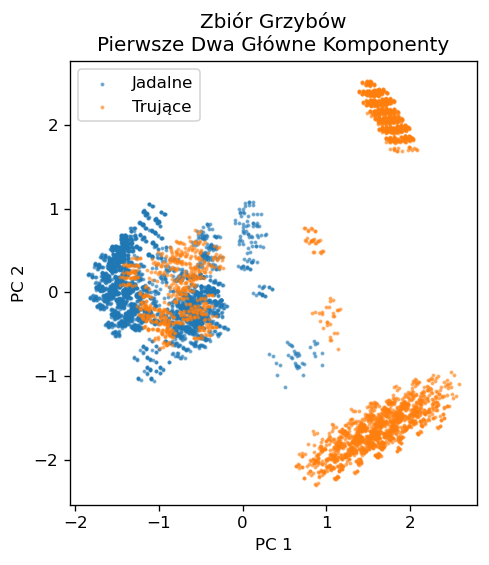

In [9]:
import matplotlib.pyplot as plt

plt.cla()
plt.clf()

plt.figure(dpi=120)
plt.scatter(X_train[y_train.values==0, 0], X_train[y_train.values==0, 1], label="Jadalne", alpha=0.5, s=2)
plt.scatter(X_train[y_train.values==1, 0], X_train[y_train.values==1, 1], label="Trujące", alpha=0.5, s=2)
plt.title("Zbiór Grzybów\nPierwsze Dwa Główne Komponenty")
plt.legend(frameon=True)
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.gca().set_aspect('equal')

## Drzewo decyzyjne
W wersji większej:

In [10]:
from sklearn.tree import DecisionTreeClassifier
model_big = DecisionTreeClassifier().fit(X_train, y_train)
print("\nDokładność testu: ", round(model_big.score(X_test, y_test), 5))


Dokładność testu:  0.93008


**Macierz błędów (Confusion Matrix)** (Daje pełniejszy obraz wyników klasyfikatora, szczególnie przy nierównych klasach):

In [11]:
from sklearn.metrics import confusion_matrix
y_pred = model_big.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print("Macierz błędów:")
print(cm)

Macierz błędów:
[[986  54]
 [ 88 903]]


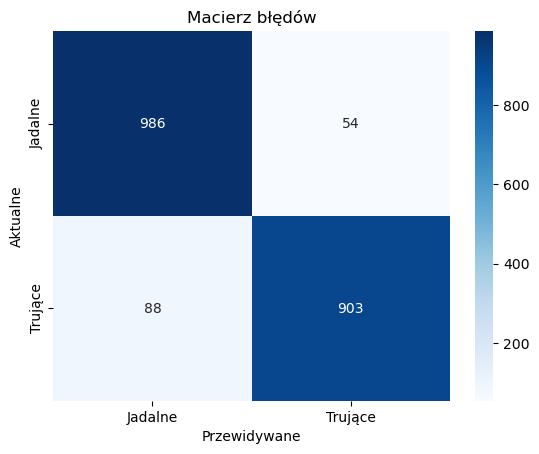

In [12]:
import seaborn as sns
# Stworzenie Heatmapy z wykorzystaniem Seaborn
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Jadalne', 'Trujące'], yticklabels=['Jadalne', 'Trujące'])
plt.xlabel('Przewidywane')
plt.ylabel('Aktualne')
plt.title('Macierz błędów')
plt.show()

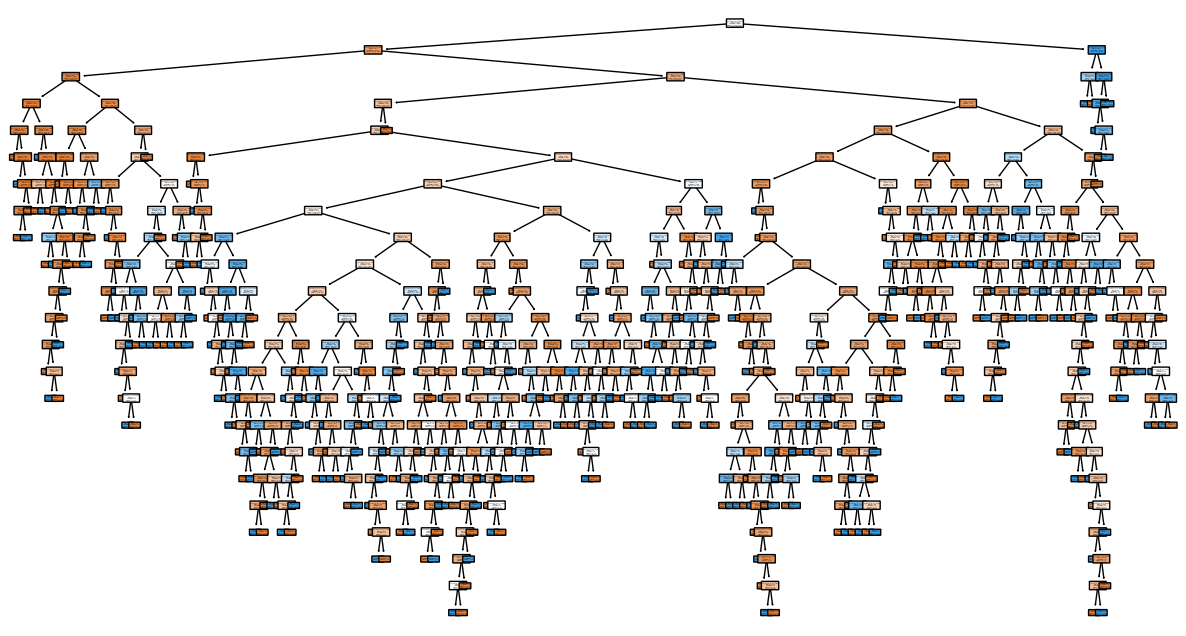

In [13]:
from sklearn.tree import plot_tree
plt.figure(figsize=(15, 8))
plot_tree(model_big, feature_names=X.columns.tolist(), class_names=['Jadalne', 'Trujące'], filled=True, rounded=True)
plt.show()

W wersji mniejszej:

In [14]:
# Wersja mniejsza z ograniczoną głębokością drzewa
model_small = DecisionTreeClassifier(max_depth=3).fit(X_train, y_train)
print("\nDokładność testu (wersja mniejsza): ", round(model_small.score(X_test, y_test), 5))


Dokładność testu (wersja mniejsza):  0.89316


In [15]:
from sklearn.metrics import confusion_matrix
y_pred = model_small.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print("Macierz błędów:")
print(cm)

Macierz błędów:
[[1035    5]
 [ 212  779]]


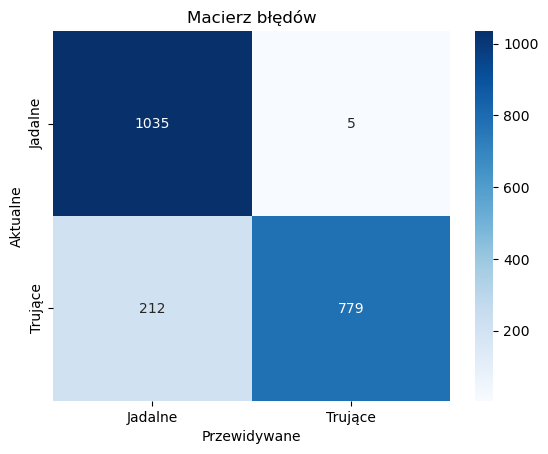

In [16]:
# Stworzenie Heatmapy z wykorzystaniem Seaborn
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Jadalne', 'Trujące'], yticklabels=['Jadalne', 'Trujące'])
plt.xlabel('Przewidywane')
plt.ylabel('Aktualne')
plt.title('Macierz błędów')
plt.show()

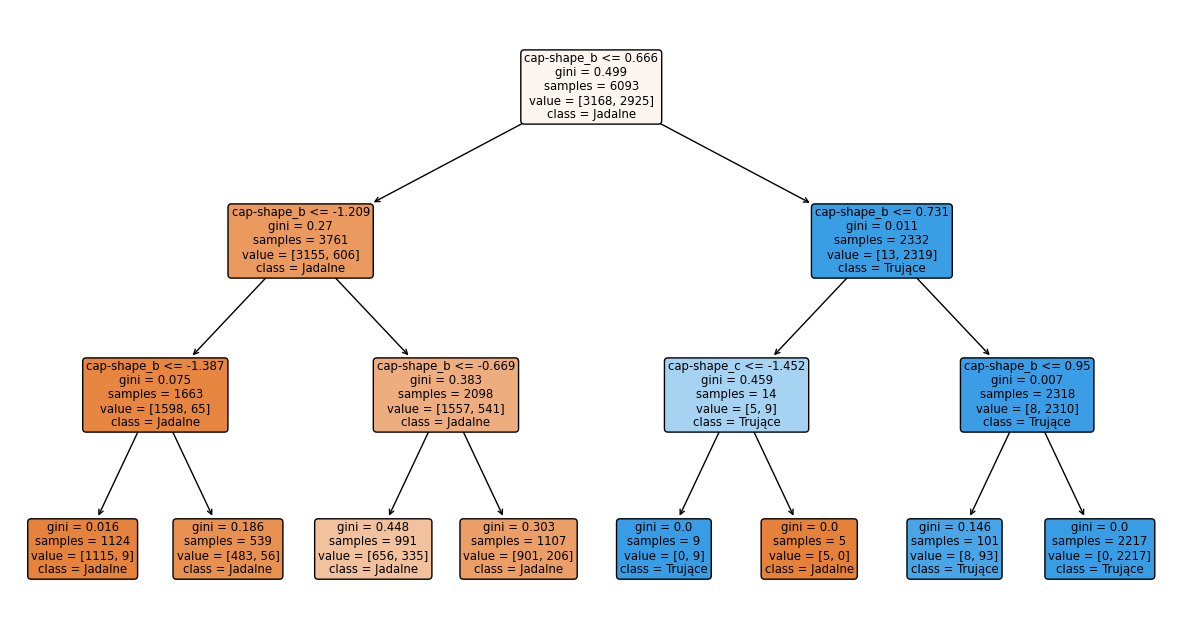

In [17]:
from sklearn.tree import plot_tree
plt.figure(figsize=(15, 8))
plot_tree(model_small, feature_names=X.columns.tolist(), class_names=['Jadalne', 'Trujące'], filled=True, rounded=True)
plt.show()

## Naiwyny Bayes
W przypadku, gdy używamy danych po PCA, GaussianNB byłby bardziej odpowiedni, ponieważ zakłada rozkład normalny, co może być bardziej adekwatne dla danych ciągłych po PCA.

In [18]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
nb_model = GaussianNB().fit(X_train, y_train)
y_pred = nb_model.predict(X_test)

print("\nDokładność testu: ", round(accuracy_score(y_test, y_pred), 5))
print("Macierz błędów:")
cm = confusion_matrix(y_test, y_pred)
print(cm)


Dokładność testu:  0.87297
Macierz błędów:
[[994  46]
 [212 779]]


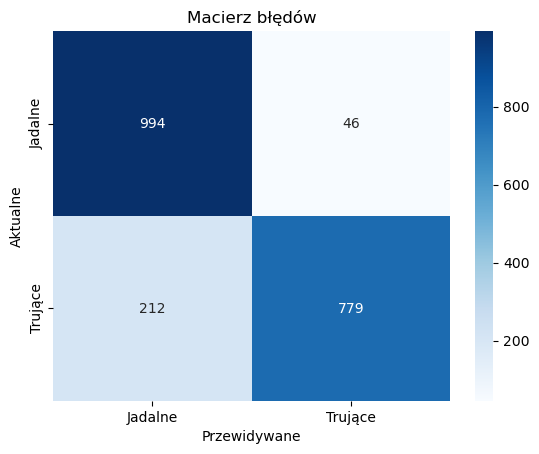

In [19]:
# Stworzenie Heatmapy z wykorzystaniem Seaborn
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Jadalne', 'Trujące'], yticklabels=['Jadalne', 'Trujące'])
plt.xlabel('Przewidywane')
plt.ylabel('Aktualne')
plt.title('Macierz błędów')
plt.show()

In [20]:
print("Raport klasyfikacji:")
print(classification_report(y_test, y_pred))

Raport klasyfikacji:
              precision    recall  f1-score   support

       False       0.82      0.96      0.89      1040
        True       0.94      0.79      0.86       991

    accuracy                           0.87      2031
   macro avg       0.88      0.87      0.87      2031
weighted avg       0.88      0.87      0.87      2031



## K Najbliższych Sąsiadów
W przypadku KNN często konieczne jest znormalizowanie danych, aby miały podobne skale. W tym celu skorzystałem z StandardScaler. Pipline to narzędzie, które umożliwiwa łączenie wielu kroków przetwarzania danych w jedną sekwencję.


Dokładność testu dla k=3: 0.92171

Dokładność testu dla k=5: 0.91827

Dokładność testu dla k=7: 0.91728

Dokładność testu dla k=9: 0.91974

Dokładność testu dla k=11: 0.91827


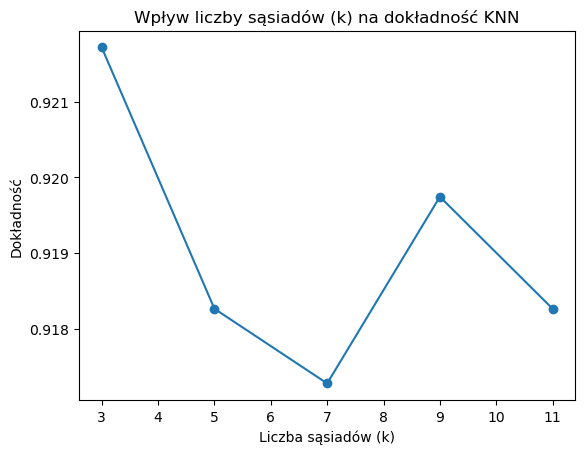

In [21]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Eksperymentowanie z różnymi wartościami k
k_values = [3, 5, 7, 9, 11]
accuracy_scores = []

for k in k_values:
    knn_model = Pipeline([
        ('scaler', StandardScaler()),
        ('knn', KNeighborsClassifier(n_neighbors=k))
    ]).fit(X_train, y_train)

    y_pred = knn_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

    print(f"\nDokładność testu dla k={k}: {round(accuracy, 5)}")

# Wykres porównawczy
plt.plot(k_values, accuracy_scores, marker='o')
plt.title('Wpływ liczby sąsiadów (k) na dokładność KNN')
plt.xlabel('Liczba sąsiadów (k)')
plt.ylabel('Dokładność')
plt.show()

## Sieć Neuronowa

In [22]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

2023-12-01 17:16:32.148301: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [23]:
# Definicja topologii sieci
def create_neural_network(input_dim, output_dim, hidden_layers, neurons_per_layer):
    model = Sequential()
    model.add(Dense(neurons_per_layer, input_dim=input_dim, activation='relu'))

    for _ in range(hidden_layers - 1):
        model.add(Dense(neurons_per_layer, activation='relu'))

    model.add(Dense(output_dim, activation='sigmoid'))  # Zakładając binarną klasyfikację

    return model

In [24]:
# Definicja konfiguracji uczenia
def train_neural_network(model, X_train, y_train, optimizer, learning_rate, batch_size, epochs):
    model.compile(optimizer=optimizer(learning_rate=learning_rate),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=0)

    return model, history

In [25]:
# Przykład użycia
input_dim = X_train.shape[1]
output_dim = 1  # Zakładamy binarną klasyfikację

# Przykładowa topologia i konfiguracja
model_topology = [64, 32]  # Warstwy ukryte z 64 i 32 neuronami
neurons_per_layer = 64
optimizer = Adam
learning_rate = 0.001
batch_size = 64
epochs = 10

# Tworzenie modelu
nn_model = create_neural_network(input_dim, output_dim, len(model_topology), neurons_per_layer)

# Trenowanie modelu
trained_model, history = train_neural_network(nn_model, X_train, y_train, optimizer, learning_rate, batch_size, epochs)

In [30]:
import numpy as np
y_pred_nn = np.round(trained_model.predict(X_test)).astype(int).flatten()
accuracy_nn = accuracy_score(y_test, y_pred_nn)

64/64 [==============================] - 0s 891us/step


In [33]:
print("Macierz błędów:")
cm = confusion_matrix(y_test, y_pred)
print(cm)

Macierz błędów:
[[1003   37]
 [ 129  862]]


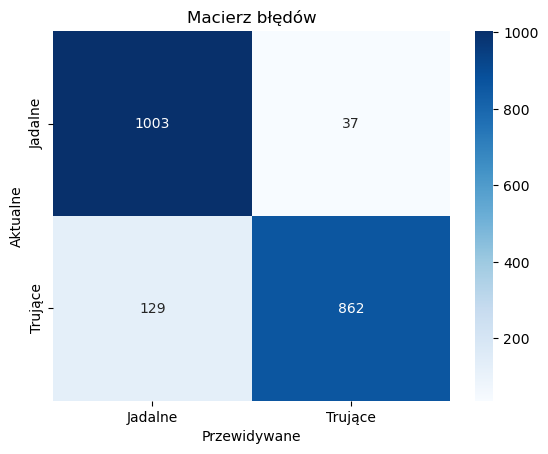

In [34]:
# Stworzenie Heatmapy z wykorzystaniem Seaborn
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Jadalne', 'Trujące'], yticklabels=['Jadalne', 'Trujące'])
plt.xlabel('Przewidywane')
plt.ylabel('Aktualne')
plt.title('Macierz błędów')
plt.show()

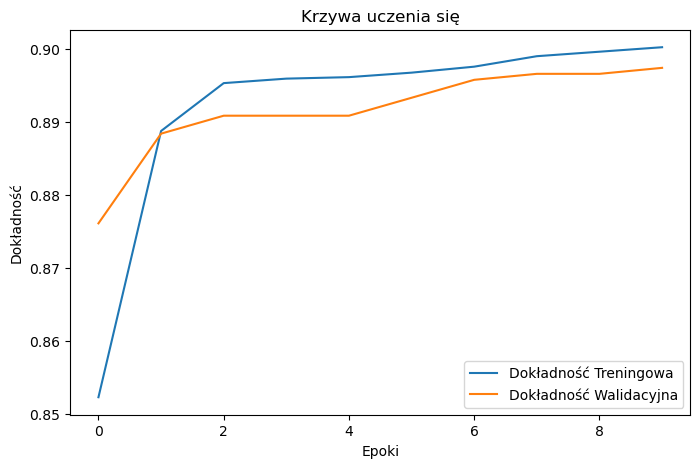

In [36]:
plt.figure(figsize=(8, 5))
plt.plot(history.history['accuracy'], label='Dokładność Treningowa')
plt.plot(history.history['val_accuracy'], label='Dokładność Walidacyjna')
plt.xlabel('Epoki')
plt.ylabel('Dokładność')
plt.title('Krzywa uczenia się')
plt.legend()
plt.show()

In [37]:
from tensorflow.keras.utils import plot_model

# Wizualizacja struktury sieci neuronowej
plot_model(trained_model, to_file='neural_network_structure.png', show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.
